<a href="https://colab.research.google.com/github/vmadalasa/EVAConsolidated/blob/master/EVAS12/Madhu_final_MV_S12_Json_experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import json

In [ ]:
dog_annt = json.load(open('dogs.json'))

print('')
json.dumps(dog_annt)

'{"dog 2.jpg9442": {"filename": "dog 2.jpg", "size": 9442, "regions": [{"shape_attributes": {"name": "rect", "x": 50, "y": 23, "width": 242, "height": 136}, "region_attributes": {"name": "Doglyingdown", "type": "DOG", "image_quality": {"good": true, "frontal": true, "good_illumination": true}, "Imagewithinpicture": "yes"}}], "file_attributes": {"caption": "Dog lying down on grass", "public_domain": "yes", "image_url": ""}}, "dog 1.jpg4689": {"filename": "dog 1.jpg", "size": 4689, "regions": [{"shape_attributes": {"name": "rect", "x": 39, "y": 1, "width": 211, "height": 169}, "region_attributes": {"name": "dogselfie", "type": "DOG", "image_quality": {"good": true, "frontal": true, "good_illumination": true}, "Imagewithinpicture": "no"}}], "file_attributes": {"caption": "dog selfie", "public_domain": "yes", "image_url": ""}}, "extra dog 2.jpg7509": {"filename": "extra dog 2.jpg", "size": 7509, "regions": [{"shape_attributes": {"name": "rect", "x": 17, "y": 3, "width": 232, "height": 190}

In [ ]:
df = pd.read_json ('dogs.json')
print (df)

                                                     dog 2.jpg9442  ...                                     dog 3.jpg10682
filename                                                 dog 2.jpg  ...                                          dog 3.jpg
size                                                          9442  ...                                              10682
regions          [{'shape_attributes': {'name': 'rect', 'x': 50...  ...  [{'shape_attributes': {'name': 'rect', 'x': 50...
file_attributes  {'caption': 'Dog lying down on grass', 'public...  ...  {'caption': 'dog in classic sitting pose, whit...

[4 rows x 53 columns]


In [ ]:
dog_annt.items()

dict_items([('dog 2.jpg9442', {'filename': 'dog 2.jpg', 'size': 9442, 'regions': [{'shape_attributes': {'name': 'rect', 'x': 50, 'y': 23, 'width': 242, 'height': 136}, 'region_attributes': {'name': 'Doglyingdown', 'type': 'DOG', 'image_quality': {'good': True, 'frontal': True, 'good_illumination': True}, 'Imagewithinpicture': 'yes'}}], 'file_attributes': {'caption': 'Dog lying down on grass', 'public_domain': 'yes', 'image_url': ''}}), ('dog 1.jpg4689', {'filename': 'dog 1.jpg', 'size': 4689, 'regions': [{'shape_attributes': {'name': 'rect', 'x': 39, 'y': 1, 'width': 211, 'height': 169}, 'region_attributes': {'name': 'dogselfie', 'type': 'DOG', 'image_quality': {'good': True, 'frontal': True, 'good_illumination': True}, 'Imagewithinpicture': 'no'}}], 'file_attributes': {'caption': 'dog selfie', 'public_domain': 'yes', 'image_url': ''}}), ('extra dog 2.jpg7509', {'filename': 'extra dog 2.jpg', 'size': 7509, 'regions': [{'shape_attributes': {'name': 'rect', 'x': 17, 'y': 3, 'width': 232,

In [ ]:
import numpy as np

att = []
for row, row_attr in dog_annt.items():
  for i in row_attr['regions']:
    dic = {'filename': row_attr['filename'] }
    #dic['name'] = row_attr['name']
    dic['size'] = row_attr['size']
    
    iq = i ['region_attributes']
    dic['name'] = iq['name']
    dic ['image_quality'] =iq['image_quality']


    sa = i['shape_attributes']
     
    dic['x'] = sa['x']
    dic['y'] = sa['y']
    dic['height'] = sa['height']
    dic['width'] = sa['width']
    dic['Ratio_image_height'] = sa['height']/sa['x']
    dic['Ratio_image_width'] = sa['width']/sa['y']
    NormHt=sa['height']/sa['x']
    NormWdt=sa['width']/sa['y']
    dic['log_height'] = np.log(NormHt)
    dic['log_width'] = np.log(NormWdt)

    att.append(dic)


In [ ]:
df = pd.DataFrame.from_dict(att, orient='columns')
df.isna

<bound method DataFrame.isna of            filename   size  ... log_height log_width
0         dog 2.jpg   9442  ...   1.000632  2.353444
1         dog 1.jpg   4689  ...   1.466337  5.351858
2   extra dog 2.jpg   7509  ...   2.413811  4.348125
3        dog 55.jpg   5938  ...   1.414950  4.094345
4        dog 54.jpg   6965  ...   1.988928  4.394449
5        dog 53.jpg  10992  ...   2.495956  4.779123
6        dog 52.jpg   5495  ...   1.433056  4.436752
7        dog 51.jpg   5085  ...   0.630089  2.159484
8        dog 50.jpg   5577  ...  -0.016529  4.477337
9        dog 49.jpg   5484  ...   1.091644  1.620191
10       dog 48.jpg   6399  ...   0.647685  2.653242
11       dog 47.jpg   6807  ...   1.022239  4.143135
12       dog 46.jpg   7681  ...   1.013315  0.897942
13       dog 45.jpg   7051  ...   3.548979  3.576550
14       dog 44.jpg   6111  ...   1.602965  2.944439
15       dog 43.jpg   9871  ...   1.636106  1.634131
16       dog 42.jpg   6528  ...   0.980829  1.720664
17       dog 4

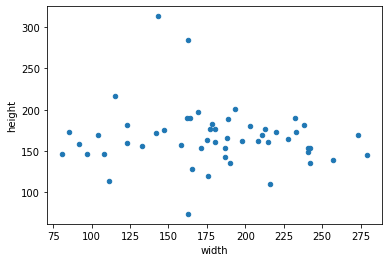

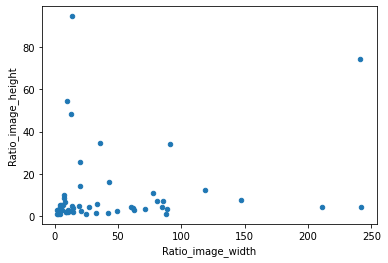

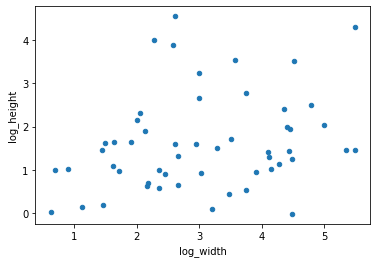

In [ ]:
df.plot.scatter('width','height')
df.plot.scatter('Ratio_image_width','Ratio_image_height')
df.plot.scatter('log_width','log_height')

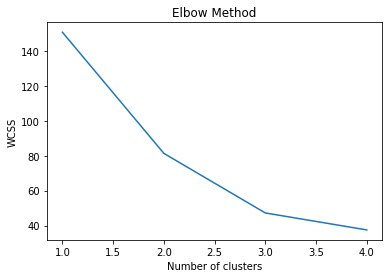

In [ ]:
from extrautils import extrautils

wcss=[]

X = df[['log_width', 'log_height']].to_numpy()


wcss = extrautils.kmeans_wcss(X, seed_range=4, init='k-means++', max_iter=300, n_init=15, random_state=0)

plt.plot(range(1,5),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
We find that number of clusters as per kmean is 2. 3 may also be used but beyond that the curve is flat.